In [1]:
!pip install hazm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 54.3 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=324a861a091e5c9f7724913df14b57775dbc729d35468c5687e504ff6dc71e6d
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Attempting uninstall: numpy
   

In [1]:
import pandas as pd
import re
from hazm import Normalizer, word_tokenize, stopwords_list

df = pd.read_csv("/content/Snappfood - Sentiment Analysis.csv", sep="\t", encoding="utf-8")

columns_to_keep = ['comment', 'label_id']
df = df[columns_to_keep].dropna(subset=['comment', 'label_id']).reset_index(drop=True)

normalizer = Normalizer()
stop_words = set(stopwords_list())

def preprocess_optimized(text):
    if pd.isna(text):
        return ""

    text = normalizer.normalize(str(text))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if len(t) > 2 and t not in stop_words]

    return " ".join(tokens)

df['processed'] = df['comment'].apply(preprocess_optimized)

df.to_csv('/content/snappfood_processed.csv', index=False)

In [3]:
import pandas as pd
import re
from hazm import Normalizer, word_tokenize, stopwords_list

df = pd.read_excel("/content/comment.xlsx")

df = df[['comment']].dropna().reset_index(drop=True)

normalizer = Normalizer()
stop_words = set(stopwords_list())

def preprocess_optimized(text):
    if pd.isna(text):
        return ""

    text = normalizer.normalize(str(text))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if len(t) > 2 and t not in stop_words]

    return " ".join(tokens)

df['processed'] = df['comment'].apply(preprocess_optimized)

df.to_csv("/content/digikala_processed.csv", index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/digikala_processed.csv')

df.to_excel('/content/digikala_processed.xlsx', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/USER/Desktop/Deep learning/Deep05/new preprocess/snappfood_processed.csv')

df = df.dropna(subset=['label_id', 'processed'])

texts = df['processed'].tolist()
labels = df['label_id'].astype(int).tolist()

In [2]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import numpy as np
from tqdm import tqdm

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
bert_model = TFAutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

def get_bert_embeddings(texts, tokenizer, model, max_len=64):
    embeddings = []
    for text in tqdm(texts):
        inputs = tokenizer(text, return_tensors='tf', max_length=max_len, truncation=True, padding='max_length')
        outputs = model(inputs)[0]
        cls_vector = outputs[:, 0, :]
        embeddings.append(cls_vector.numpy()[0])
    return np.array(embeddings)

X = get_bert_embeddings(texts, tokenizer, bert_model)
y = np.array(labels)

C:\Users\USER\anaconda3\envs\tf-env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
100%|██████████| 69265/69265 [4:01:33<00:00,  4.78it/s]  


In [ ]:
np.save('X_snapp_cls.npy', X)
np.save('y_snapp.npy', y)
# X = np.load('X_snapp_cls.npy')
# y = np.load('y_snapp.npy')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape

model = Sequential([
    Reshape((1, 768), input_shape=(768,)),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

C:\Users\USER\anaconda3\envs\tf-env\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 1, 768)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       459,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,585 (1.78 MB)

 Trainable params: 467,585 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X, y, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8244 - loss: 0.3847 - val_accuracy: 0.7988 - val_loss: 0.4316
Epoch 2/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8304 - loss: 0.3773 - val_accuracy: 0.7989 - val_loss: 0.4283
Epoch 3/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8270 - loss: 0.3762 - val_accuracy: 0.7987 - val_loss: 0.4279
Epoch 4/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8322 - loss: 0.3708 - val_accuracy: 0.8005 - val_loss: 0.4331
Epoch 5/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8322 - loss: 0.3680 - val_accuracy: 0.7961 - val_loss: 0.4327
Epoch 6/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8384 - loss: 0.3626 - val_accuracy: 0.7984 - val_loss: 0.4322
Epoch 7/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8381 - loss: 0.3592 - val_accuracy: 0.7982 - val_loss: 0.4316
Epoch 8/30
866/866 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8412 - loss: 0.3565 - val_accuracy: 0.

In [9]:
model.save('snapp_model.h5')
model.save('snapp_model.keras')

In [2]:
import pandas as pd
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/USER/Desktop/Deep learning/Deep05/new preprocess/digikala_processed.csv')
texts_raw = df['processed'].tolist()

C:\Users\USER\anaconda3\envs\tf-env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
valid_indices = [i for i, t in enumerate(texts_raw) if isinstance(t, str)]
texts = [texts_raw[i] for i in valid_indices]

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
bert_model = TFAutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

def get_bert_embeddings(texts, tokenizer, model, max_len=64):
    embeddings = []
    for text in tqdm(texts):
        inputs = tokenizer(text, return_tensors='tf', max_length=max_len,
                           truncation=True, padding='max_length')
        outputs = model(inputs)[0]
        cls_vector = outputs[:, 0, :]
        embeddings.append(cls_vector.numpy()[0])
    return np.array(embeddings)

X = get_bert_embeddings(texts, tokenizer, bert_model)

Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
100%|██████████| 99339/99339 [5:38:24<00:00,  4.89it/s]  


In [10]:
np.save('digikala_embeddings.npy', X)

In [8]:
from keras.models import load_model
model = load_model('snapp_model.keras')

# X = np.load('digikala_embeddings.npy')
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

df_valid = df.iloc[valid_indices].copy()
df_valid['predicted_label'] = y_pred
df_valid['predicted_sentiment'] = df_valid['predicted_label'].map({0: 'HAPPY', 1: 'SAD'})

df_valid.to_csv('digikala_predicted_final.csv', index=False)
df_valid.to_excel('digikala_predicted_final.xlsx', index=False, engine='openpyxl')

C:\Users\USER\anaconda3\envs\tf-env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3105/3105 ━━━━━━━━━━━━━━━━━━━━ 3s 858us/step


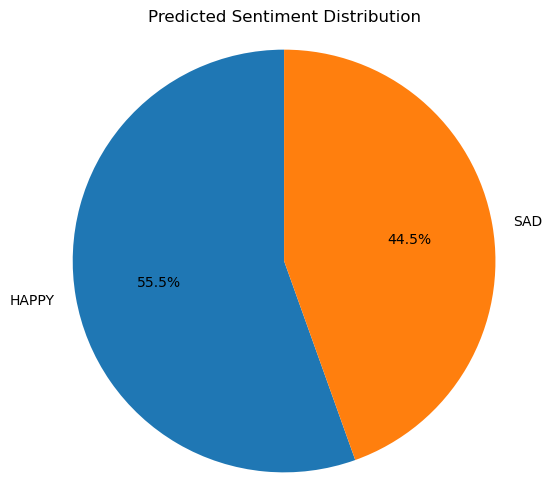

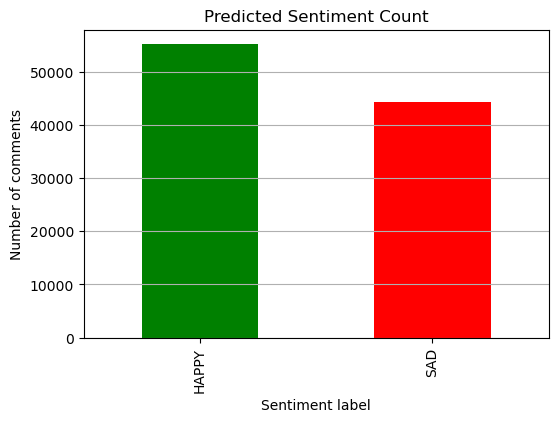

In [9]:
label_counts = df_valid['predicted_sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Sentiment Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Predicted Sentiment Count')
plt.xlabel('Sentiment label')
plt.ylabel('Number of comments')
plt.grid(axis='y')
plt.show()